In [83]:
import torch
import sys; sys.path.append("src")
from src.models import *
from utils.utils import viz, get_data_loaders
from IPython.display import Image
import torchvision
import onnx
import onnxruntime
import numpy as np
from matplotlib import pyplot as plt

def viz(images_batch, plot_in_jupyter=False):
    grid = torchvision.utils.make_grid(images_batch, nrow=5, padding=4)
    if torch.is_tensor(grid):  
        grid = grid.detach().cpu().numpy() 
    grid = grid.transpose((1, 2, 0))

    if plot_in_jupyter:
        plt.figure(figsize=(5, 5))
        plt.imshow(grid)
        plt.axis('off')
        plt.show()

In [72]:
# load model
model = Lvae(latent_dim=20, image_shape=(3, 64, 64), device="cpu")
model.load_state_dict(torch.load("src/results/CelebA_linear_no_trick/weights/best_val/best_val_loss_1_vae.pt"))
model.eval()

Lvae(
  (encoder): Sequential(
    (0): Linear(in_features=12288, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=128, out_features=40, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=12288, bias=True)
    (5): Sigmoid()
  )
)

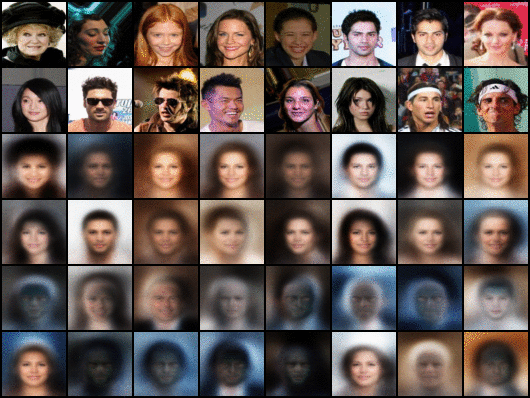

In [73]:
gif_path = 'src/results/CelebA_linear_no_beta/imgs/val/output.gif'
Image(filename=gif_path)

# Sampling

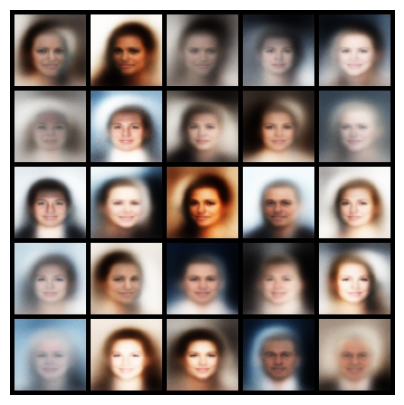

In [86]:
pred, z = model.sampler(num_samples=25)
viz(pred, plot_in_jupyter=True)

In [87]:
MODEL_NAME = "src/results/CelebA_linear_onnx/weights/best_val/best_model_[1-1].onnx"
onnx_model = onnx.load(MODEL_NAME)
onnx.checker.check_model(onnx_model)
ort_session = onnxruntime.InferenceSession(MODEL_NAME)
def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

(20, 3, 64, 64)


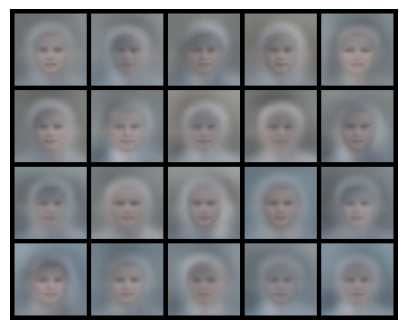

In [89]:
batch = 20
x = np.random.rand(batch, 3, 64, 64)
print(x.shape)
x = x.reshape(batch, -1)
x = x.astype(np.float32)
pred, z, mu = ort_session.run(None, {'input': x})
viz(torch.asarray(pred), plot_in_jupyter=True)